#  Análise exploratória
Na minha opinião, a análise exploratória é uma das fases mais importantes de qualquer projeto que lide com dados. Aqui o objetivo é entender o contexto em que trabalharemos e como são os dados que temos que explorar, para termos toda uma documentação que precisaremos para criar os próximos algoritmos, mesmo os de Machine Learning. Acredito que mesmo nesta fase já podemos encontrar alguns Insights.

<img src="./Data/Image/Capa.png" alt="capa">

---

# **SINASC** • Sistema de Informação sobre Nascidos Vivos
**Data Science** Portfólio
#### [Enzo Schitini](https://www.linkedin.com/in/enzoschitini/) - Data Scientist • Expert Bubble.io • UX & UI @ Nugus creator

---

#### **Tópicos**

<ol type="1">
  <li>Carregamento dos dados e entendimento do contexto</li>
  <li>Entender a estrutura dos dados</li>
  <li>Tratamemto dos dados</li>
  <li>Atributos e colunas</li>
  <li>Métricas e visualização do dados</li>
</ol>

- `Variáveis de análise`

| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |

# `Carregando os dados`

- Importando os pacotes

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Data Frame

In [182]:
Sinasc = pd.read_csv('./Data/Data/SINASC_RO_2019.csv')

# Estrutura dos dados

Entender a estrutura dos dados significa saber quantas Linhas e Colunas existem, se há dados duplicados ou não, o Nome das colunas, seu Tipo, sua quantidade de categorias, quantos dados nulos e a porcentagem deles.

- Linhas e colunas

In [183]:
linhas, colunas = Sinasc.shape
print(f'Temos {linhas} linhas e {colunas} colunas.')

Temos 27028 linhas e 69 colunas.


- Linhas duplicadas

In [184]:
duplicated = Sinasc.duplicated().to_list()

for x in duplicated:
    if x == 'True':
        print('True')

- Pequena tabela

In [185]:
Sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# `Schema`

Agora vamos ver com mais detalhes como é a estrutura da coluna

 - Colunas e seus respectivos tipos de dados.

In [186]:
def guia(data_frame):
    linhas, qnt_colunas = data_frame.shape
    sequencia = list(range(qnt_colunas + 1))
    sequencia = sequencia[1:]

    colunas = data_frame.columns.to_list()
    lista_tipos = [str(type(data_frame[col][0])).split("'")[1] for col in data_frame.columns]
    lista_categorias = [data_frame[col].nunique() for col in data_frame.columns]

    elementos_nulos = data_frame.isnull().sum()
    elementos_nulos = elementos_nulos.to_list()

    percentual_dados_nulos = round((data_frame.isnull().sum() / linhas) * 100)
    percentual_dados_nulos = percentual_dados_nulos.to_list()

    dados = pd.DataFrame({'Nome': colunas, 
                          'Tipo': lista_tipos, 
                          'qnt_categorias': lista_categorias,
                          'Dados nulos' : elementos_nulos,
                          'Dados nulos %' : percentual_dados_nulos}, index=sequencia)
    
    # Cabeçalhos
    print('Tabela Exploratória')
    print(f'Nesses dados temos {linhas} linhas e {qnt_colunas} colunas.')
    
    return dados

guia_df = guia(Sinasc)
guia_df.head(50)

Tabela Exploratória
Nesses dados temos 27028 linhas e 69 colunas.


,Nome,Tipo,qnt_categorias,Dados nulos,Dados nulos %
1,ORIGEM,numpy.int64,1,0,0.0
2,CODESTAB,numpy.float64,130,115,0.0
3,CODMUNNASC,numpy.int64,74,0,0.0
4,LOCNASC,numpy.int64,4,0,0.0
5,IDADEMAE,numpy.int64,40,0,0.0
6,ESTCIVMAE,numpy.float64,6,317,1.0
7,ESCMAE,str,5,312,1.0
8,CODOCUPMAE,numpy.float64,421,2907,11.0
9,QTDFILVIVO,numpy.float64,15,1573,6.0
10,QTDFILMORT,numpy.float64,11,2098,8.0


In [187]:
guia_df.tail(19)

,Nome,Tipo,qnt_categorias,Dados nulos,Dados nulos %
51,TPFUNCRESP,numpy.float64,4,67,0.0
52,TPDOCRESP,numpy.float64,6,14,0.0
53,DTDECLARAC,numpy.float64,368,52,0.0
54,ESCMAEAGR1,numpy.float64,13,249,1.0
55,STDNEPIDEM,numpy.int64,1,0,0.0
56,STDNNOVA,numpy.int64,2,0,0.0
57,CODPAISRES,numpy.int64,1,0,0.0
58,TPROBSON,numpy.int64,11,0,0.0
59,PARIDADE,numpy.int64,2,0,0.0
60,KOTELCHUCK,numpy.int64,6,0,0.0


# Tratamendo dos dados

### Reparando as colunas

### Dados faltantes

- Colunas com dados vazios

In [188]:
guia_df_nulos = guia_df[guia_df['Dados nulos %'] > 0]
guia_df_nulos

,Nome,Tipo,qnt_categorias,Dados nulos,Dados nulos %
6,ESTCIVMAE,numpy.float64,6,317,1.0
7,ESCMAE,str,5,312,1.0
8,CODOCUPMAE,numpy.float64,421,2907,11.0
9,QTDFILVIVO,numpy.float64,15,1573,6.0
10,QTDFILMORT,numpy.float64,11,2098,8.0
12,GESTACAO,str,6,1232,5.0
21,RACACOR,str,5,647,2.0
23,IDANOMAL,numpy.float64,3,591,2.0
25,CODANOMAL,float,114,26814,99.0
30,DTRECORIGA,numpy.float64,0,27028,100.0


- Linhas que têm dados vazios

In [189]:
df_isnull = Sinasc[Sinasc.isnull().any(axis=1)]
df_isnull = pd.DataFrame(df_isnull)

df_isnull.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Atributos e colunas

Agora saberemos como funcionam as colunas categóricas e numéricas, para saber se há algum erro quanto às categorias e valores

# Atributos **categóricos**.

In [190]:
Sinasc_categoricos = Sinasc.select_dtypes('object')
Sinasc_categoricos 

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


- Aplicando `describe()`

In [191]:
Sinasc_categoricos.describe().transpose() # freq / count = %

,count,unique,top,freq
ESCMAE,26716,5,8 a 11 anos,15633
GESTACAO,25796,6,37 a 41 semanas,22589
GRAVIDEZ,26949,3,Única,26452
PARTO,26979,2,Cesáreo,18036
DTNASC,27028,365,2019-04-10,116
SEXO,27024,2,Masculino,13886
RACACOR,26381,5,Parda,19594
DTCADASTRO,27028,321,2019-03-08,265
CODANOMAL,214,114,Q699,17
VERSAOSIST,27028,3,3.2.01,27017


- Alguns gráficos

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecat

<Axes: xlabel='PARTO', ylabel='count'>

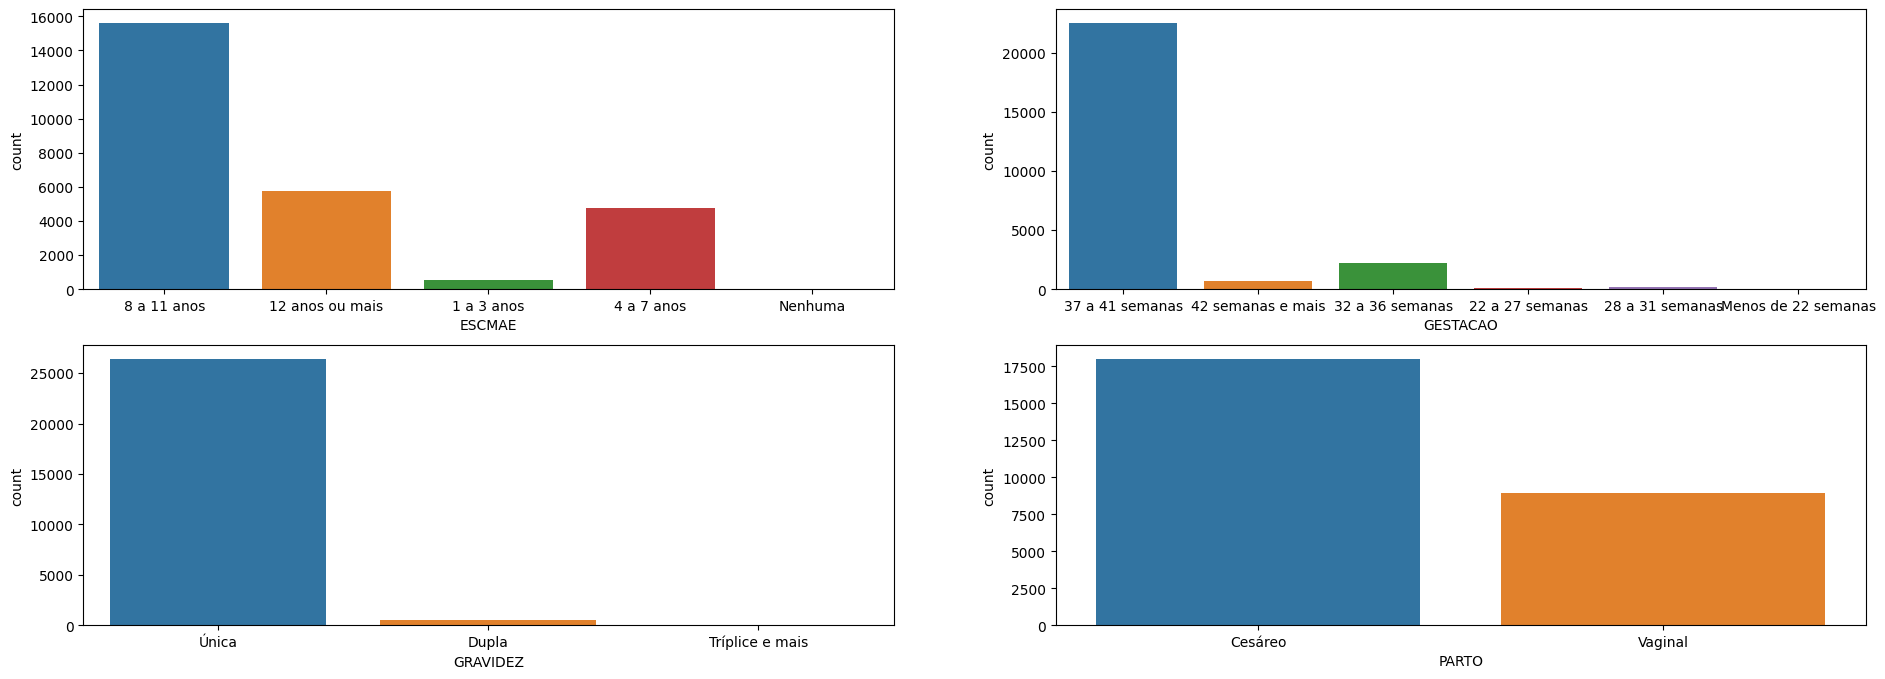

In [192]:
plt.close('all')
plt.rc('figure', figsize=(23, 8))
fig, axes = plt.subplots(2, 2)

sns.countplot(ax = axes[0, 0], x='ESCMAE', data=Sinasc)
sns.countplot(ax = axes[0, 1], x='GESTACAO', data=Sinasc)
sns.countplot(ax = axes[1, 0], x='GRAVIDEZ', data=Sinasc)
sns.countplot(ax = axes[1, 1], x='PARTO', data=Sinasc)	

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecat

<Axes: xlabel='munResUf', ylabel='count'>

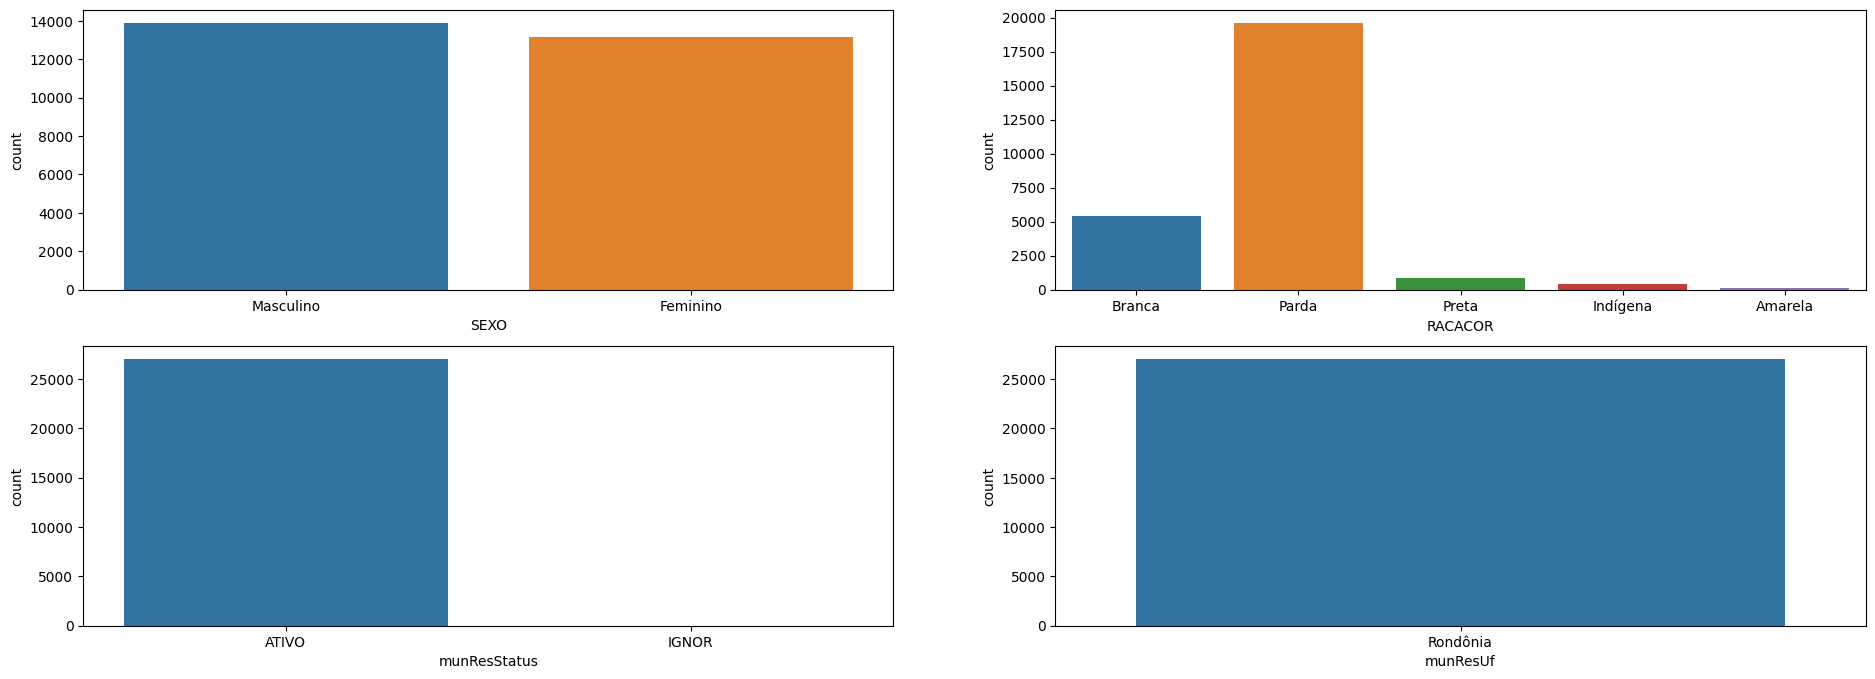

In [193]:
plt.close('all')
plt.rc('figure', figsize=(23, 8))
fig, axes = plt.subplots(2, 2)

sns.countplot(ax = axes[0, 0], x='SEXO', data=Sinasc)
sns.countplot(ax = axes[0, 1], x='RACACOR', data=Sinasc)
sns.countplot(ax = axes[1, 0], x='munResStatus', data=Sinasc)
sns.countplot(ax = axes[1, 1], x='munResUf', data=Sinasc)	

# Atributos **numéricos**.

In [194]:
Sinasc_numericos = Sinasc.select_dtypes('number')
Sinasc_numericos 

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,...,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,NaN,0.0,0.0,110001,...,1,1,1,0,5,1,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,999992.0,1.0,0.0,110001,...,1,1,5,1,5,2,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,513205.0,2.0,0.0,110001,...,1,1,7,1,5,3,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,231205.0,0.0,0.0,110037,...,1,1,2,0,4,4,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,999992.0,1.0,0.0,110001,...,1,1,5,1,5,5,-11.93554,-61.99982,338.0,7067.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,2604388.0,510340,1,32,2.0,333115.0,1.0,0.0,110030,...,1,1,7,1,5,2767632,-12.74137,-60.13858,595.0,11518.915
27024,1,2752654.0,510675,1,19,1.0,999992.0,0.0,0.0,110092,...,1,1,1,0,5,2772678,-12.55684,-60.90185,340.0,5126.723
27025,1,9659366.0,510787,1,24,2.0,421125.0,0.0,1.0,110030,...,1,1,3,1,5,2776905,-12.74137,-60.13858,595.0,11518.915
27026,1,9659366.0,510787,1,21,2.0,999992.0,1.0,0.0,110030,...,1,1,10,1,5,2777105,-12.74137,-60.13858,595.0,11518.915


- Aplicando `describe()`

In [195]:
Sinasc_numericos.drop('ORIGEM', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CODESTAB,26913.0,3.267629e+06,1.122677e+06,1.531800e+04,2.496534e+06,2.798484e+06,3.970442e+06,9.659366e+06
CODMUNNASC,27028.0,1.110378e+05,1.810275e+04,1.100010e+05,1.100110e+05,1.100200e+05,1.100200e+05,5.208700e+05
LOCNASC,27028.0,1.011396e+00,1.616792e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
IDADEMAE,27028.0,2.609372e+01,6.387094e+00,1.100000e+01,2.100000e+01,2.600000e+01,3.100000e+01,5.300000e+01
ESTCIVMAE,26711.0,2.545318e+00,1.671248e+00,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00,9.000000e+00
CODOCUPMAE,24121.0,7.956040e+05,2.838850e+05,1.020500e+04,5.211250e+05,9.999920e+05,9.999920e+05,9.999940e+05
QTDFILVIVO,25455.0,1.053899e+00,1.170874e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+01
QTDFILMORT,24930.0,2.665062e-01,6.139085e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.800000e+01
CODMUNRES,27028.0,1.100291e+05,3.603647e+01,1.100000e+05,1.100120e+05,1.100200e+05,1.100280e+05,1.101800e+05
CONSULTAS,27028.0,3.576402e+00,7.884923e-01,1.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,9.000000e+00


## `Outliers e Distribuição dos valores`

<p align="center">
  Enzo Schitini
</p>

<p align="center">
  Data Scientist • Expert Bubble.io • UX & UI @ Nugus creator
</p>